# Anomaly Detection for Trigger: exploring data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
import sklearn
import collections
from sklearn.model_selection import train_test_split
import json

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
# Lists holding all of the data (data22 and MC)
datasets = {}
pass_HLT = {}
pass_L1 = {}
weights = {}

In [4]:
f_data = "/eos/home-m/mmcohen/ntuples/AOD_EB_ntuples_05-22-2024.h5"

with h5py.File(f_data, 'r') as hf:
    HLT_jets = hf['HLT_jets'][:]
    L1_jFexSR_jets = hf['L1_jFexSR_jets'][:]
    L1_jFexLR_jets = hf['L1_jFexLR_jets'][:]
    HLT_electrons = hf['HLT_electrons'][:]
    LRT_electrons = hf['LRT_electrons'][:]
    L1_egammas = hf['L1_egammas'][:]
    HLT_muons = hf['HLT_muons'][:]
    LRT_muons = hf['LRT_muons'][:]
    L1_muons = hf['L1_muons'][:]
    L1_eFex_taus = hf['L1_eFex_taus'][:]
    L1_jFex_taus = hf['L1_jFex_taus'][:]
    HLT_photons = hf['HLT_photons'][:]
    HLT_MET = hf['HLT_MET'][:] # [magnitude, eta, phi]
    L1_MET = hf['L1_MET'][:] # [magnitude, eta, phi]
    pass_L1_unprescaled = hf["pass_L1_unprescaled"][:]
    pass_HLT_unprescaled = hf["pass_HLT_unprescaled"][:]
    EB_weights = hf["EB_weights"][:]
    event_numbers = hf["event_number"][:]

In [5]:
print(len(HLT_jets))
print(HLT_MET.shape)

2059879
(2059879, 3)


In [6]:
L1toHLT_MET = (L1_MET[:, 0] - HLT_MET[:, 0]) / L1_MET[:, 0]
print(L1toHLT_MET.shape)

(2059879,)


/tmp/ipykernel_327/4049920530.py:1: RuntimeWarning: divide by zero encountered in divide
  L1toHLT_MET = (L1_MET[:, 0] - HLT_MET[:, 0]) / L1_MET[:, 0]


In [7]:
L1toHLT_MET = []
MET_weights = []
for i in range(len(L1_MET)):
    if L1_MET[i, 0] == 0 or HLT_MET[i, 0] == -999: continue

    L1toHLT_MET.append((L1_MET[i, 0] - HLT_MET[i, 0]) / L1_MET[i, 0])
    MET_weights.append(EB_weights[i])

In [9]:
print(np.array(L1toHLT_MET).shape)

(549735,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


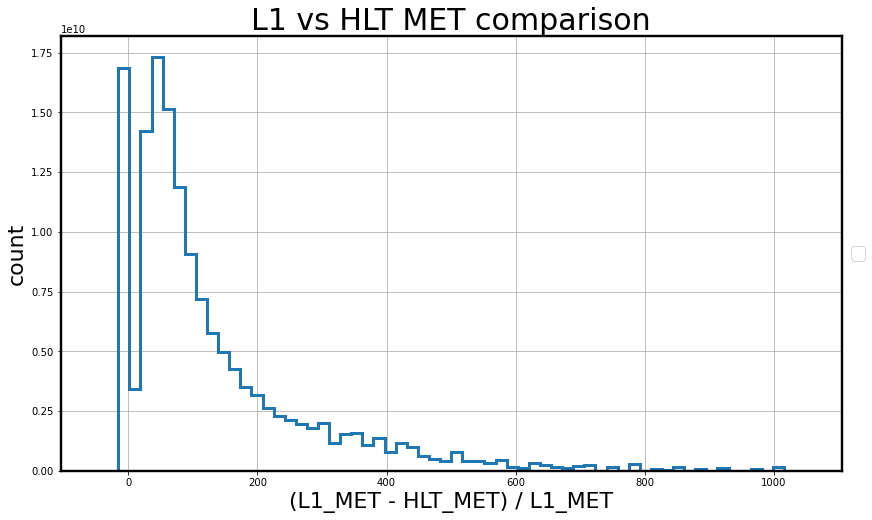

In [10]:
plt.figure(figsize=(14, 8))
plt.rcParams['axes.linewidth'] = 2.4
bins = np.linspace(-50, 1050, 65)

plt.hist(L1toHLT_MET, bins=bins, histtype='step', density=False, fill=False, linewidth=3, weights=MET_weights)

plt.xlabel(f'(L1_MET - HLT_MET) / L1_MET', fontsize=22)
plt.ylabel('count', fontsize=22)
plt.title(f'L1 vs HLT MET comparison', fontsize=30)
plt.grid()
plt.legend(fontsize=18, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

In [23]:
L1toHLT_MET = []
MET_weights = []
for i in range(len(L1_MET)):
    if L1_MET[i, 2] == 0 or HLT_MET[i, 2] == -999: continue

    L1toHLT_MET.append((L1_MET[i, 2] - HLT_MET[i, 2]))
    MET_weights.append(EB_weights[i])

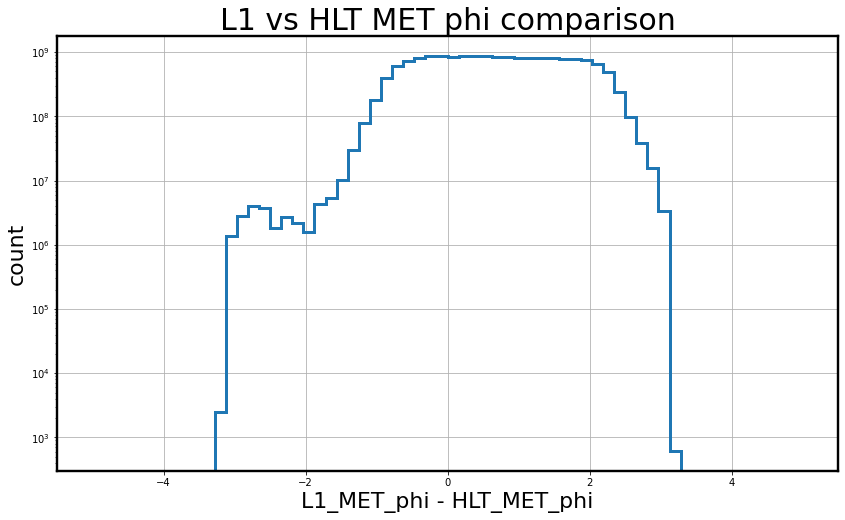

In [24]:
plt.figure(figsize=(14, 8))
plt.rcParams['axes.linewidth'] = 2.4
bins = np.linspace(-5, 5, 65)

plt.hist(L1toHLT_MET, bins=bins, histtype='step', density=False, fill=False, linewidth=3, weights=MET_weights)

plt.yscale('log')
plt.xlabel(f'L1_MET_phi - HLT_MET_phi', fontsize=22)
plt.ylabel('count', fontsize=22)
plt.title(f'L1 vs HLT MET phi comparison', fontsize=30)
plt.grid()
plt.show()

## MET

In [39]:
HLT_MET.shape

(2059879, 3)

In [41]:
HLT_jets.shape

(2059879, 10, 4)

In [46]:
np.sum(HLT_MET[:,0]==-999)

1510123

In [48]:
event_numbers[50:55]

array([1163947457, 1163957270, 1163974591, 1163927181, 1163988341])

In [29]:
L1_MET[50:55, :]

array([[18.31 ,  0.   ,  1.19 ],
       [15.743,  0.   ,  1.096],
       [ 4.045,  0.   ,  0.149],
       [54.16 ,  0.   ,  0.93 ],
       [ 2.6  ,  0.   ,  0.395]])

In [30]:
HLT_MET[50:55, :]

array([[  13.838,    0.   ,   -1.204],
       [-999.   ,    0.   , -999.   ],
       [-999.   ,    0.   , -999.   ],
       [   9.254,    0.   ,   -0.569],
       [-999.   ,    0.   , -999.   ]])

## egamma / electrons / photons

In [49]:
L1_egammas[50:55, :]

array([[[13.9  , -0.813,  1.325],
        [ 5.4  ,  0.338,  1.031],
        [ 5.2  ,  0.412,  1.031]],

       [[50.8  , -0.762,  0.933],
        [20.6  , -0.813,  1.031],
        [19.2  ,  0.188, -2.111]],

       [[ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 4.8  ,  0.263, -1.522],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]]])

In [50]:
HLT_electrons[50:55, :]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [51]:
HLT_photons[50:55, :]

array([[[16.614, -0.82 ,  1.352],
        [16.614, -0.82 ,  1.352],
        [ 7.045,  0.333,  0.995]],

       [[53.141, -0.758,  0.925],
        [53.141, -0.758,  0.925],
        [53.141, -0.758,  0.925]],

       [[ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 8.825,  0.255, -1.536],
        [ 8.825,  0.255, -1.536],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]]])

In [60]:
event_numbers[42:47]

array([1163950425, 1163892040, 1163934153, 1163957863, 1163937219])

In [52]:
L1_egammas[42:47, :]

array([[[10.5  ,  0.113, -2.307],
        [ 0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   ]],

       [[27.1  ,  2.288, -0.245],
        [ 3.2  ,  1.062,  2.994],
        [ 0.   ,  0.   ,  0.   ]],

       [[12.5  ,  1.113, -2.111],
        [10.8  , -0.713,  0.933],
        [ 0.   ,  0.   ,  0.   ]],

       [[ 4.9  ,  1.113,  2.503],
        [ 3.9  ,  0.287,  1.129],
        [ 0.   ,  0.   ,  0.   ]],

       [[58.   , -2.188,  0.245],
        [14.9  ,  0.688, -2.798],
        [ 0.   ,  0.   ,  0.   ]]])

In [53]:
HLT_electrons[42:47, :]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [54]:
HLT_photons[42:47, :] 

array([[[11.784,  0.108, -2.31 ],
        [11.784,  0.108, -2.31 ],
        [ 0.   ,  0.   ,  0.   ]],

       [[18.746,  2.294, -0.247],
        [18.746,  2.294, -0.247],
        [12.63 ,  2.298, -0.321]],

       [[14.734,  1.13 , -2.158],
        [14.734,  1.13 , -2.158],
        [ 7.757, -0.71 ,  0.898]],

       [[ 5.666,  1.111,  2.52 ],
        [ 5.666,  1.111,  2.52 ],
        [ 4.523,  0.292,  1.176]],

       [[63.068, -2.207,  0.233],
        [63.068, -2.207,  0.233],
        [16.521,  0.661, -2.804]]])

In [56]:
HLT_photons[101, :]

array([[23.804, -1.552,  1.504],
       [23.804, -1.552,  1.504],
       [10.009, -1.557,  1.424]])

In [58]:
HLT_electrons.shape

(2059879, 3, 3)

In [57]:
np.sum(HLT_electrons[:,0]==[0., 0., 0.])

6151788

In [59]:
3*2059879

6179637

## Muons

In [72]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=False)

In [73]:
L1_muons[50:55, :]

array([[[ 0.008 ,  1.7742,  1.1653],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.008 , -0.5059,  1.5127],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]]])

In [74]:
HLT_muons[50:55, :]

array([[[7.3613, 1.7769, 1.1547],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]]])

In [79]:
L1_muons[102:107, :]

array([[[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.008 , -1.0478,  1.629 ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]]])

In [78]:
HLT_muons[102:107, :]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

## Jets

In [32]:
 L1_jFexSR_jets[50:52, :]

array([[[ 23.8  ,  -0.85 ,   1.325],
        [ 23.2  ,   0.45 ,   1.031],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ]],

       [[109.4  ,  -0.75 ,   1.031],
        [107.2  ,   0.15 ,  -2.013],
        [ 19.2  ,   3.164,   1.382],
        [ 18.2  ,  -0.35 ,   1.031],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ]]])

In [80]:
 L1_jFexLR_jets[50:52, :]

array([[[19.4   , -1.35  ,  1.6199],
        [18.8   , -0.85  ,  1.3254],
        [17.8   , -0.45  ,  0.7363],
        [17.4   ,  0.45  ,  1.0308],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]],

       [[91.8   , -0.35  ,  1.0308],
        [78.    ,  0.15  , -2.0126],
        [74.4   , -1.35  ,  0.8345],
        [21.    ,  0.25  ,  1.0308],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ]]])

In [33]:
HLT_jets[50:52, :]

array([[[ 56.3  , 172.74 ,  -1.785,  -1.468],
        [ 43.141,  47.472,   0.43 ,   0.982],
        [ 39.028,  90.886,  -1.488,  -2.884],
        [ 24.735,  80.029,   1.841,   1.169],
        [ 23.582,  31.493,  -0.795,   1.305],
        [ 22.648, 151.014,  -2.585,   3.008],
        [ 18.461,  82.838,  -2.181,  -2.851],
        [ 17.369,  76.581,  -2.163,   0.937],
        [ 11.956,  24.851,   1.36 ,   0.931],
        [  9.145,  34.326,  -1.996,  -2.272]],

       [[157.792, 161.632,   0.184,  -2.039],
        [132.634, 170.761,  -0.723,   0.978],
        [ 43.63 , 523.86 ,   3.177,   1.283],
        [ 20.278,  34.845,   1.13 ,  -2.427],
        [ 15.553,  42.368,   1.656,  -2.791],
        [  8.652,  10.303,   0.571,  -2.588],
        [  8.646,   9.263,  -0.372,  -2.086],
        [  6.636,   6.83 ,   0.176,   0.63 ],
        [  0.   ,   0.   ,   0.   ,   0.   ],
        [  0.   ,   0.   ,   0.   ,   0.   ]]])